In [1]:
import pandas as pd


glassdoor_jobs = pd.read_csv('glassdoor_jobs.csv')

glassdoor_jobs.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Data Scientist,-1,Job Overview\nA Data Scientist at ExploreLearn...,4.2,Cambium Learning Group\n4.3,Remote,1001 to 5000 Employees,2004,Company - Private,Primary & Secondary Schools,Education,$500 million to $1 billion (USD)
1,2024 University Graduate - Data Scientist,Employer Provided Salary:$83K - $153K,Our Company\n\nChanging the world through digi...,4.4,Adobe\n4.4,"San Jose, CA",10000+ Employees,1982,Company - Public,Computer Hardware Development,Information Technology,$5 to $10 billion (USD)
2,Data Scientist – Entry Level 2024,Employer Provided Salary:$71K - $133K,Introduction\nRanked by Forbes as one of the w...,3.9,IBM\n3.9,"Atlanta, GA",10000+ Employees,1911,Company - Public,Information Technology Support Services,Information Technology,$10+ billion (USD)
3,Data Scientist 2,Employer Provided Salary:$94K - $183K,The Microsoft 365 team is looking for a Data S...,4.3,Microsoft\n4.3,"Redmond, WA",10000+ Employees,1975,Company - Public,Computer Hardware Development,Information Technology,$10+ billion (USD)
4,Entry Level Data Scientist 2023/2024,$48K - $78K (Glassdoor est.),"You may not realize it, but you’ve likely used...",3.9,CPChem\n3.9,"The Woodlands, TX",1001 to 5000 Employees,2000,Company - Private,Chemical Manufacturing,Manufacturing,$10+ billion (USD)


In [2]:
# Checking for missing values in the dataset
missing_values = glassdoor_jobs.isnull().sum()
missing_percentage = (glassdoor_jobs.isnull().sum() / len(glassdoor_jobs)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})
missing_data.sort_values(by='Percentage (%)', ascending=False)

,Missing Values,Percentage (%)
Job Title,0,0.0
Salary Estimate,0,0.0
Job Description,0,0.0
Rating,0,0.0
Company Name,0,0.0
Location,0,0.0
Size,0,0.0
Founded,0,0.0
Type of ownership,0,0.0
Industry,0,0.0


In [3]:
import numpy as np
# Replacing 'Not Available', '-1', and 'Unknown' values with NaN
glassdoor_jobs.replace(['Not Available', '-1', 'Unknown'], np.nan, inplace=True)

# Dropping rows with NaN values for simplicity
glassdoor_jobs.dropna(inplace=True)

# Checking the shape of the cleaned dataset
glassdoor_jobs.shape

(901, 12)

In [4]:
# Removing rows where any column has a value of '-1' as a string or integer
glassdoor_jobs = glassdoor_jobs.replace('-1', pd.NA).dropna(how='any')
glassdoor_jobs.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
1,2024 University Graduate - Data Scientist,Employer Provided Salary:$83K - $153K,Our Company\n\nChanging the world through digi...,4.4,Adobe\n4.4,"San Jose, CA",10000+ Employees,1982,Company - Public,Computer Hardware Development,Information Technology,$5 to $10 billion (USD)
2,Data Scientist – Entry Level 2024,Employer Provided Salary:$71K - $133K,Introduction\nRanked by Forbes as one of the w...,3.9,IBM\n3.9,"Atlanta, GA",10000+ Employees,1911,Company - Public,Information Technology Support Services,Information Technology,$10+ billion (USD)
3,Data Scientist 2,Employer Provided Salary:$94K - $183K,The Microsoft 365 team is looking for a Data S...,4.3,Microsoft\n4.3,"Redmond, WA",10000+ Employees,1975,Company - Public,Computer Hardware Development,Information Technology,$10+ billion (USD)
4,Entry Level Data Scientist 2023/2024,$48K - $78K (Glassdoor est.),"You may not realize it, but you’ve likely used...",3.9,CPChem\n3.9,"The Woodlands, TX",1001 to 5000 Employees,2000,Company - Private,Chemical Manufacturing,Manufacturing,$10+ billion (USD)
6,Senior Data Scientist,Employer Provided Salary:$141K - $254K,POSITION: Senior Data Scientist\n\nJOB Locatio...,3.6,AT&T\n3.6,"Dallas, TX",10000+ Employees,1876,Company - Public,Telecommunications Services,Telecommunications,$10+ billion (USD)


In [5]:
# Checking if there are any '-1' values left in the dataset
contains_minus_one = (glassdoor_jobs == '-1').any().any() or (glassdoor_jobs == -1).any().any()
contains_minus_one

True

In [6]:
# Replacing '-1' and -1 values with NaN
glassdoor_jobs.replace(['-1', -1], np.nan, inplace=True)

# Dropping rows with NaN values
glassdoor_jobs.dropna(inplace=True)

# Checking again if there are any '-1' values left in the dataset
contains_minus_one_check = (glassdoor_jobs == '-1').any().any() or (glassdoor_jobs == -1).any().any()
contains_minus_one_check

False

In [7]:
# Checking for outliers using the IQR method for the 'Rating' column, as it's a numeric column
Q1 = glassdoor_jobs['Rating'].quantile(0.25)
Q3 = glassdoor_jobs['Rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = glassdoor_jobs[(glassdoor_jobs['Rating'] < lower_bound) | (glassdoor_jobs['Rating'] > upper_bound)]
outliers

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
44,Data Scientist,Employer Provided Salary:$82K - $96K,Galaxy Technologies is looking to hire a highl...,2.6,Galaxy Technologies\n2.6,"Riverside, CA",51 to 200 Employees,1985.0,Company - Private,Consumer Product Manufacturing,Manufacturing,Unknown / Non-Applicable
67,Data Scientist,Employer Provided Salary:$90K - $120K,Meet REVOLVE:\nREVOLVE is the next-generation ...,2.7,REVOLVE\n2.8,"Cerritos, CA",1001 to 5000 Employees,2003.0,Company - Public,"Department, Clothing & Shoe Stores",Retail & Wholesale,Unknown / Non-Applicable
86,Data Scientist,Employer Provided Salary:$96K - $134K,"GEHA (Government Employees Health Association,...",2.7,GEHA\n2.8,United States,1001 to 5000 Employees,1937.0,Nonprofit Organization,Insurance Carriers,Insurance,$1 to $5 billion (USD)
116,Data Scientist,Employer Provided Salary:$45.00 - $55.00 Per Hour,Data Scientist (Mid Level)\nLocation: Englewoo...,5.0,APPIC Solutions LLC\n5.0,"Foster City, CA",1 to 50 Employees,2017.0,Company - Private,Software Development,Information Technology,$1 to $5 million (USD)
127,Data Scientist,Employer Provided Salary:$105K - $140K,Conversica is the leading provider of Conversa...,2.8,Conversica\n2.7,"Seattle, WA",201 to 500 Employees,2007.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $100 million (USD)
140,Data Scientist,Employer Provided Salary:$150K - $175K,"We're on a mission\nAt Octaura, we continually...",5.0,Octaura\n5.0,"New York, NY",1 to 50 Employees,2022.0,Company - Private,Financial Transaction Processing,Financial Services,Unknown / Non-Applicable
142,Data Scientist/Database Administrator,$80K - $126K (Glassdoor est.),Position Overview:\nWe are seeking a highly sk...,2.8,Eccalon LLC\n2.8,"Hanover, MD",51 to 200 Employees,2017.0,Company - Private,Aerospace & Defense,Aerospace & Defense,Unknown / Non-Applicable
172,Data Scientist,$88K - $132K (Glassdoor est.),Skills relating to Mathematics/Statistics .\nG...,4.9,Wise Equation Solutions\n4.9,"Austin, TX",51 to 200 Employees,2006.0,Company - Private,Information Technology Support Services,Information Technology,$5 to $25 million (USD)
401,Data Scientist (Multiple Levels),$86K - $119K (Glassdoor est.),Description:\n\nA little about us:\nThe Red Al...,5.0,Red Alpha LLC\n5.0,"Annapolis Junction, MD",51 to 200 Employees,2011.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable
405,Data Scientist - Senior,$100K - $136K (Glassdoor est.),Job Description\nWe are seeking Data Analytic ...,5.0,The Swift Group,"Chantilly, VA",201 to 500 Employees,2019.0,Company - Private,Information Technology Support Services,Information Technology,Unknown / Non-Applicable


In [8]:
# Removing outliers from the 'Rating' column based on the previously calculated bounds
glassdoor_jobs = glassdoor_jobs[(glassdoor_jobs['Rating'] >= lower_bound) & (glassdoor_jobs['Rating'] <= upper_bound)]
glassdoor_jobs.shape

(801, 12)

In [9]:
import numpy as np
# Filter only numeric columns
numeric_cols = glassdoor_jobs.select_dtypes(include=[np.number])

# Compute the IQR for numeric columns
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Compute the bounds for numeric columns
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows based on the bounds for numeric columns
mask = (numeric_cols < lower_bound) | (numeric_cols > upper_bound)
glassdoor_jobs = glassdoor_jobs[~mask.any(axis=1)]

glassdoor_jobs.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
1,2024 University Graduate - Data Scientist,Employer Provided Salary:$83K - $153K,Our Company\n\nChanging the world through digi...,4.4,Adobe\n4.4,"San Jose, CA",10000+ Employees,1982.0,Company - Public,Computer Hardware Development,Information Technology,$5 to $10 billion (USD)
2,Data Scientist – Entry Level 2024,Employer Provided Salary:$71K - $133K,Introduction\nRanked by Forbes as one of the w...,3.9,IBM\n3.9,"Atlanta, GA",10000+ Employees,1911.0,Company - Public,Information Technology Support Services,Information Technology,$10+ billion (USD)
3,Data Scientist 2,Employer Provided Salary:$94K - $183K,The Microsoft 365 team is looking for a Data S...,4.3,Microsoft\n4.3,"Redmond, WA",10000+ Employees,1975.0,Company - Public,Computer Hardware Development,Information Technology,$10+ billion (USD)
4,Entry Level Data Scientist 2023/2024,$48K - $78K (Glassdoor est.),"You may not realize it, but you’ve likely used...",3.9,CPChem\n3.9,"The Woodlands, TX",1001 to 5000 Employees,2000.0,Company - Private,Chemical Manufacturing,Manufacturing,$10+ billion (USD)
6,Senior Data Scientist,Employer Provided Salary:$141K - $254K,POSITION: Senior Data Scientist\n\nJOB Locatio...,3.6,AT&T\n3.6,"Dallas, TX",10000+ Employees,1876.0,Company - Public,Telecommunications Services,Telecommunications,$10+ billion (USD)


C:\Users\shree\Anaconda 2023\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


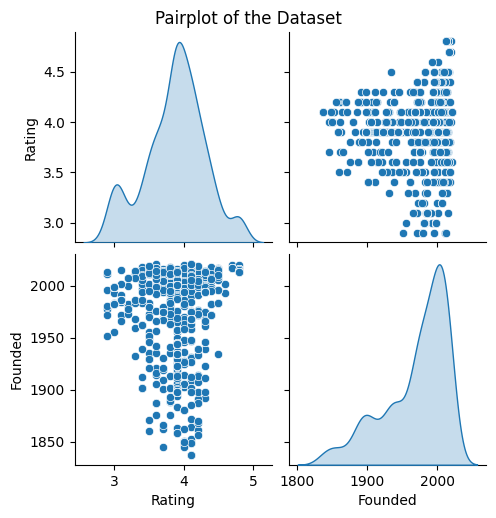

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualizing the data using pairplot to see the distribution and relationships between numeric columns
sns.pairplot(glassdoor_jobs, diag_kind='kde')
plt.suptitle('Pairplot of the Dataset', y=1.02)
plt.show()

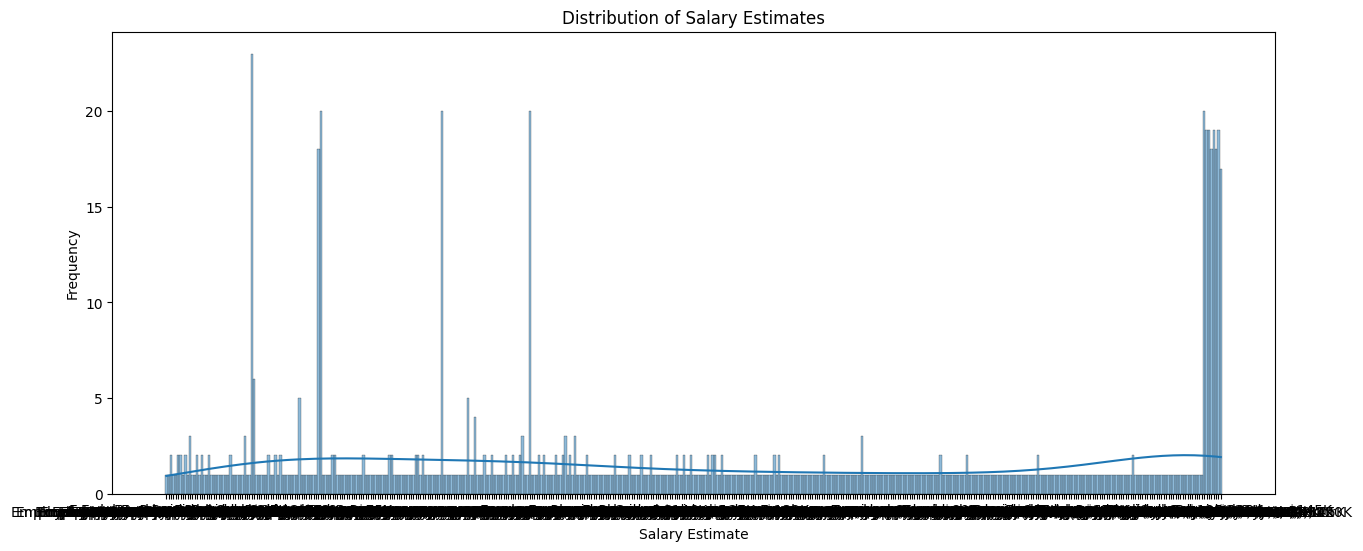

In [11]:
# Descriptive Analysis
# Distribution of Salaries
plt.figure(figsize=(15, 6))
sns.histplot(glassdoor_jobs['Salary Estimate'], kde=True, bins=30)
plt.title('Distribution of Salary Estimates')
plt.xlabel('Salary Estimate')
plt.ylabel('Frequency')
plt.show()

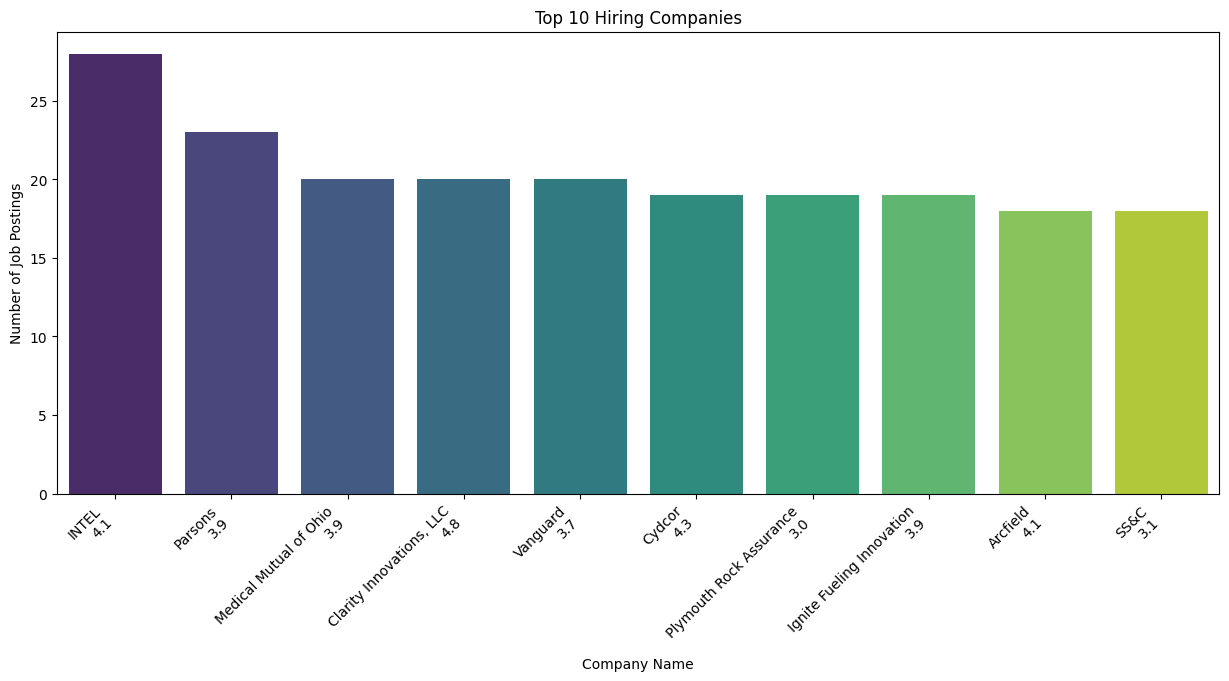

In [12]:
# Top Hiring Companies
top_companies = glassdoor_jobs['Company Name'].value_counts().head(10)
plt.figure(figsize=(15, 6))
sns.barplot(x=top_companies.index, y=top_companies.values, palette='viridis')
plt.title('Top 10 Hiring Companies')
plt.xlabel('Company Name')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45, ha='right')
plt.show()

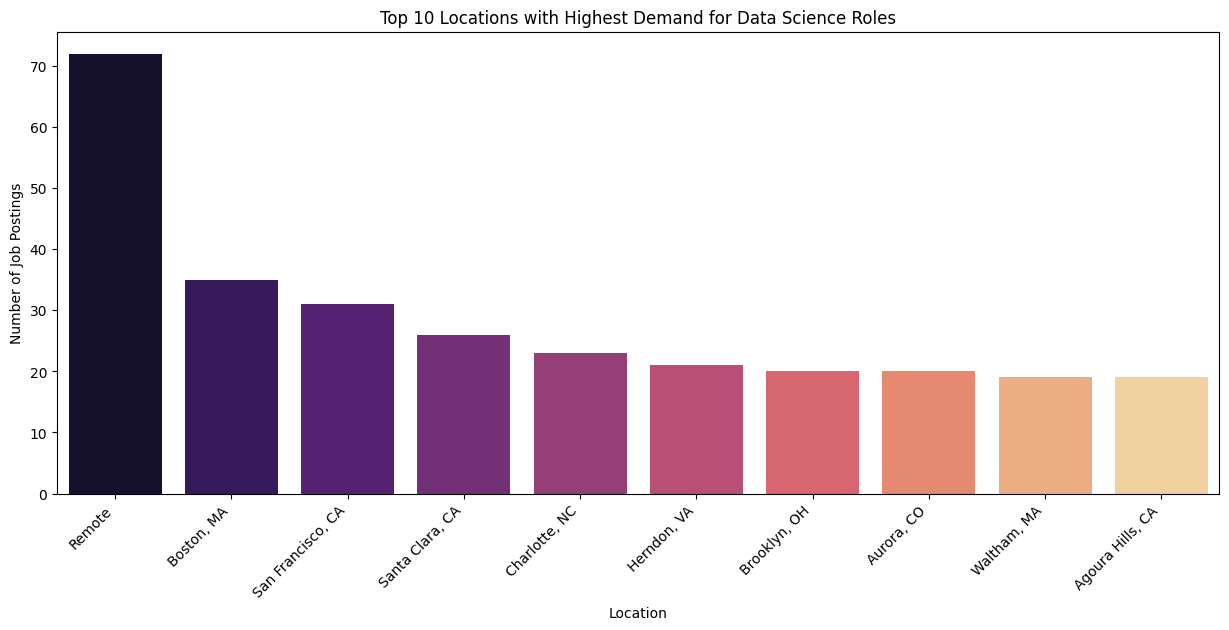

In [13]:
# Location Analysis
top_locations = glassdoor_jobs['Location'].value_counts().head(10)
plt.figure(figsize=(15, 6))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='magma')
plt.title('Top 10 Locations with Highest Demand for Data Science Roles')
plt.xlabel('Location')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45, ha='right')
plt.show()

In [14]:
# Checking the data types of 'Rating' and 'Salary Estimate' columns to ensure they are numeric
rating_dtype = glassdoor_jobs['Rating'].dtype
salary_estimate_dtype = glassdoor_jobs['Salary Estimate'].dtype
rating_dtype, salary_estimate_dtype

(dtype('float64'), dtype('O'))

In [15]:
# Displaying unique values in the 'Salary Estimate' column to understand the data
glassdoor_jobs['Salary Estimate'].unique()

array(['Employer Provided Salary:$83K - $153K',
       'Employer Provided Salary:$71K - $133K',
       'Employer Provided Salary:$94K - $183K',
       '$48K - $78K (Glassdoor est.)',
       'Employer Provided Salary:$141K - $254K',
       'Employer Provided Salary:$85K', '$102K - $138K (Glassdoor est.)',
       'Employer Provided Salary:$51.00 - $68.72 Per Hour',
       '$88K - $133K (Glassdoor est.)',
       'Employer Provided Salary:$122K - $175K',
       'Employer Provided Salary:$70K - $105K',
       'Employer Provided Salary:$93.00 - $121.00 Per Hour',
       'Employer Provided Salary:$112K', '$82K - $123K (Glassdoor est.)',
       '$121K - $169K (Glassdoor est.)',
       'Employer Provided Salary:$160K - $255K',
       'Employer Provided Salary:$102K - $152K',
       'Employer Provided Salary:$125K - $145K',
       'Employer Provided Salary:$51.00 - $52.00 Per Hour',
       'Employer Provided Salary:$130K - $146K',
       'Employer Provided Salary:$105K - $157K',
       'Employer

In [16]:
# Splitting the 'Salary Estimate' column into 'Min Salary Estimate' and 'Max Salary Estimate' columns using regex
glassdoor_jobs['Min Salary Estimate'] = glassdoor_jobs['Salary Estimate'].str.split('-').str[0].str.extract('(\d+)').astype(float) * 1000
glassdoor_jobs['Max Salary Estimate'] = glassdoor_jobs['Salary Estimate'].str.split('-').str[1].str.extract('(\d+)').astype(float) * 1000
# Recalculating the 'Average Salary Estimate' column
glassdoor_jobs['Average Salary Estimate'] = (glassdoor_jobs['Min Salary Estimate'] + glassdoor_jobs['Max Salary Estimate']) / 2
# Calculating the correlation between 'Rating' and 'Average Salary Estimate'
correlation_matrix = glassdoor_jobs[['Rating', 'Average Salary Estimate']].corr()
correlation_value = correlation_matrix.iloc[0, 1]
correlation_value

0.056327367050896464

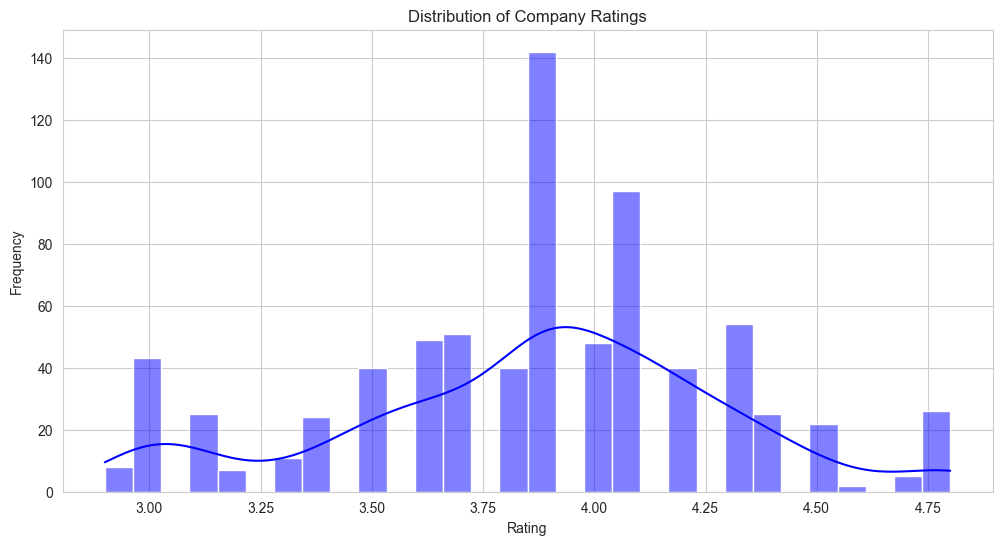

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
# Setting the style for the plots
sns.set_style('whitegrid')
# Company Rating Analysis
plt.figure(figsize=(12, 6))
sns.histplot(glassdoor_jobs['Rating'], bins=30, kde=True, color='blue')
plt.title('Distribution of Company Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

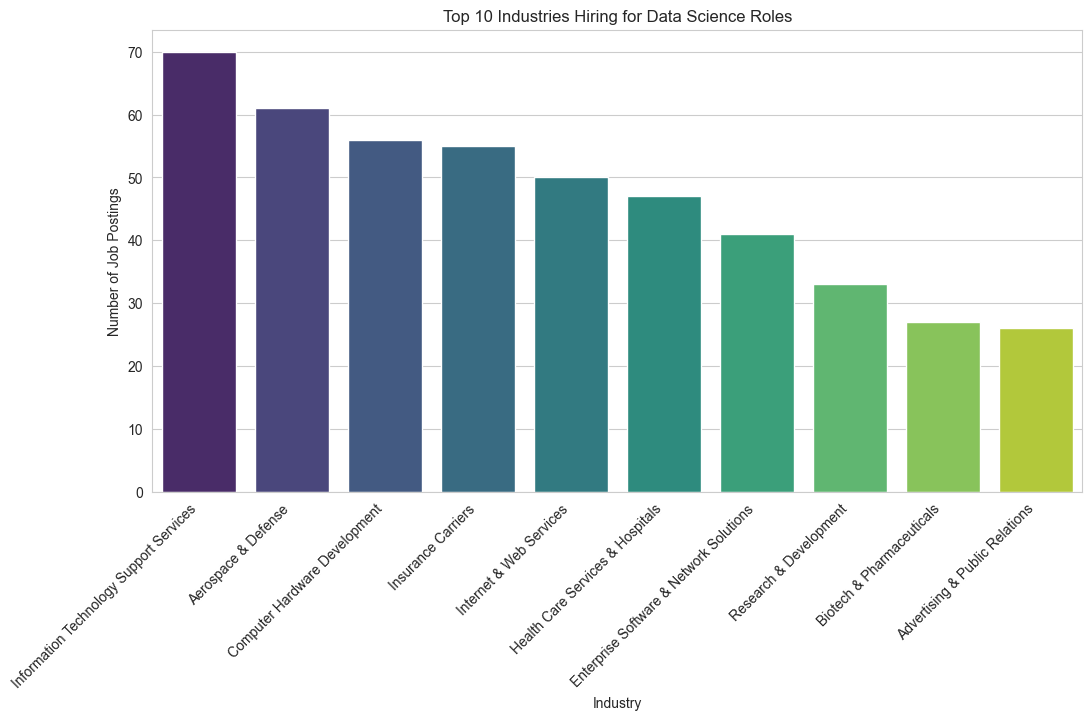

In [18]:
# Industry Analysis
plt.figure(figsize=(12, 6))
industry_counts = glassdoor_jobs['Industry'].value_counts().head(10)
sns.barplot(x=industry_counts.index, y=industry_counts.values, palette='viridis')
plt.title('Top 10 Industries Hiring for Data Science Roles')
plt.xlabel('Industry')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45, ha='right')
plt.show()

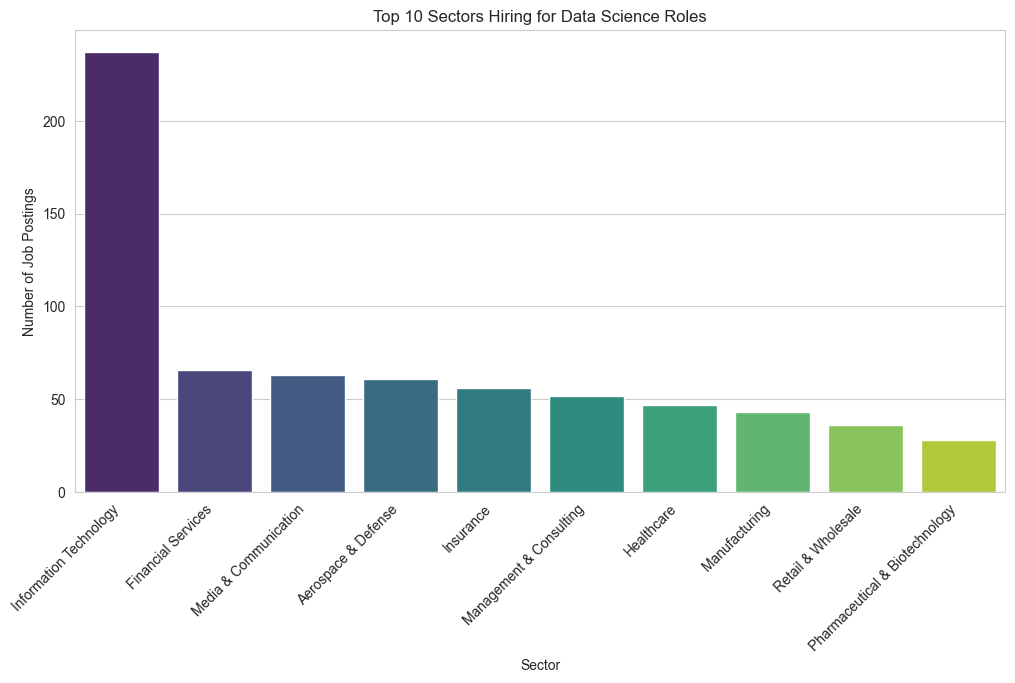

In [19]:
# Sector Analysis
plt.figure(figsize=(12, 6))
sector_counts = glassdoor_jobs['Sector'].value_counts().head(10)
sns.barplot(x=sector_counts.index, y=sector_counts.values, palette='viridis')
plt.title('Top 10 Sectors Hiring for Data Science Roles')
plt.xlabel('Sector')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45, ha='right')
plt.show()

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Extracting keywords using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.85, stop_words='english', max_features=20)
tfidf_matrix = tfidf_vectorizer.fit_transform(glassdoor_jobs['Job Description'])
keywords = tfidf_vectorizer.get_feature_names_out()
keywords

array(['analytics', 'best', 'business', 'company', 'data', 'employees',
       'experience', 'job', 'join', 'position', 'role', 'science',
       'scientist', 'services', 'solutions', 'team', 'technology', 'work',
       'working', 'world'], dtype=object)

In [21]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
# Preparing data for LDA
count_vectorizer = CountVectorizer(max_df=0.85, stop_words='english', max_features=1000)
count_matrix = count_vectorizer.fit_transform(glassdoor_jobs['Job Description'])
# Applying LDA
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_topics = lda_model.fit_transform(count_matrix)
# Extracting the words for each topic
topic_keywords = {}
for topic_idx, topic in enumerate(lda_model.components_):
    topic_keywords[topic_idx] = [count_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:][::-1]]
topic_keywords

{0: ['data',
  'team',
  'business',
  'work',
  'experience',
  'scientist',
  'science',
  'learning',
  'job',
  'analytics'],
 1: ['intel',
  'status',
  'employees',
  'gender',
  'work',
  'health',
  'services',
  'government',
  'world',
  'site'],
 2: ['work',
  'team',
  'data',
  'services',
  'working',
  'technical',
  'description',
  'innovation',
  'remote',
  'software'],
 3: ['solutions',
  'company',
  'data',
  'people',
  'career',
  'mission',
  'employees',
  'imagine',
  'time',
  'parsons'],
 4: ['data',
  'customer',
  'science',
  'work',
  'team',
  'business',
  'modeling',
  'techniques',
  'development',
  'analytics']}

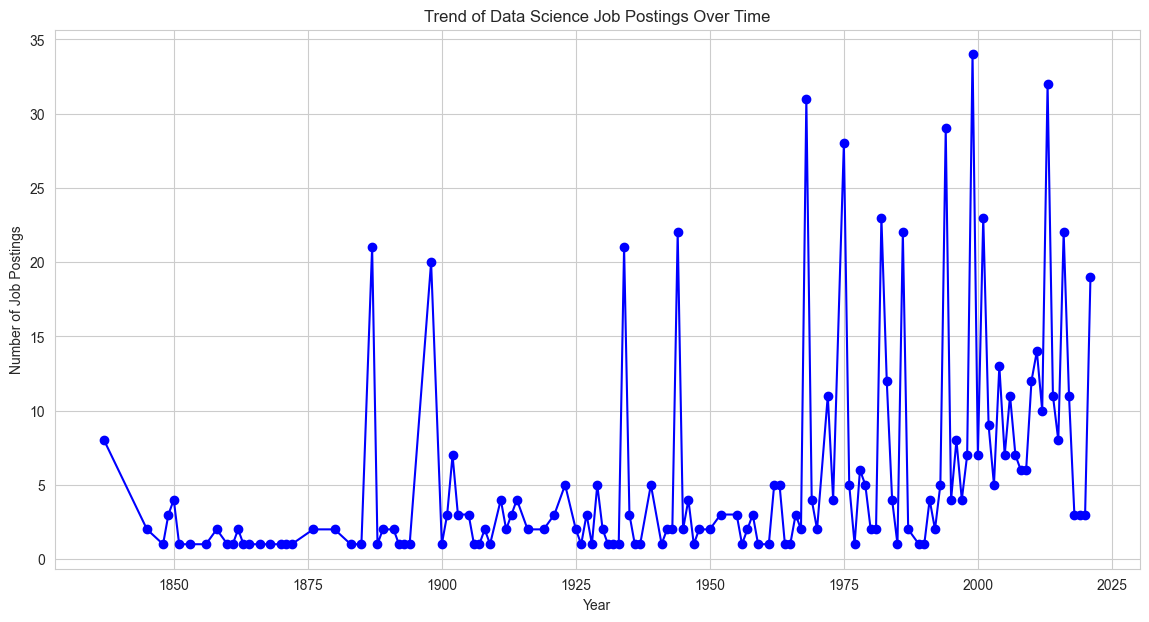

In [22]:
# Converting the 'Founded' column to datetime format
glassdoor_jobs['Founded'] = pd.to_datetime(glassdoor_jobs['Founded'], format='%Y', errors='coerce')
# Grouping the data by year to count the number of job postings for each year
yearly_postings = glassdoor_jobs.groupby(glassdoor_jobs['Founded'].dt.year)['Job Title'].count()
# Visualizing the trend of job postings over time
plt.figure(figsize=(14, 7))
yearly_postings.plot(kind='line', marker='o', color='blue')
plt.title('Trend of Data Science Job Postings Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Job Postings')
plt.grid(True)
plt.show()

In [23]:
non_numeric_cols = glassdoor_jobs.select_dtypes(exclude=[np.number]).columns
non_numeric_cols

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Company Name',
       'Location', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue'],
      dtype='object')

In [24]:
# Only compute correlation for numeric columns
numeric_cols = glassdoor_jobs.select_dtypes(include=[np.number])
salary_correlation = numeric_cols.corr()['Average Salary Estimate'].sort_values(ascending=False)

In [25]:
# These should work without modification if 'Size', 'Location', and 'Industry' are categorical or string columns 
# and 'Average Salary Estimate' is now correctly converted to numeric.
company_size_salary = glassdoor_jobs.groupby('Size')['Average Salary Estimate'].mean().sort_values(ascending=False)
location_salary = glassdoor_jobs.groupby('Location')['Average Salary Estimate'].mean().sort_values(ascending=False).head(10)
industry_salary = glassdoor_jobs.groupby('Industry')['Average Salary Estimate'].mean().sort_values(ascending=False).head(10)

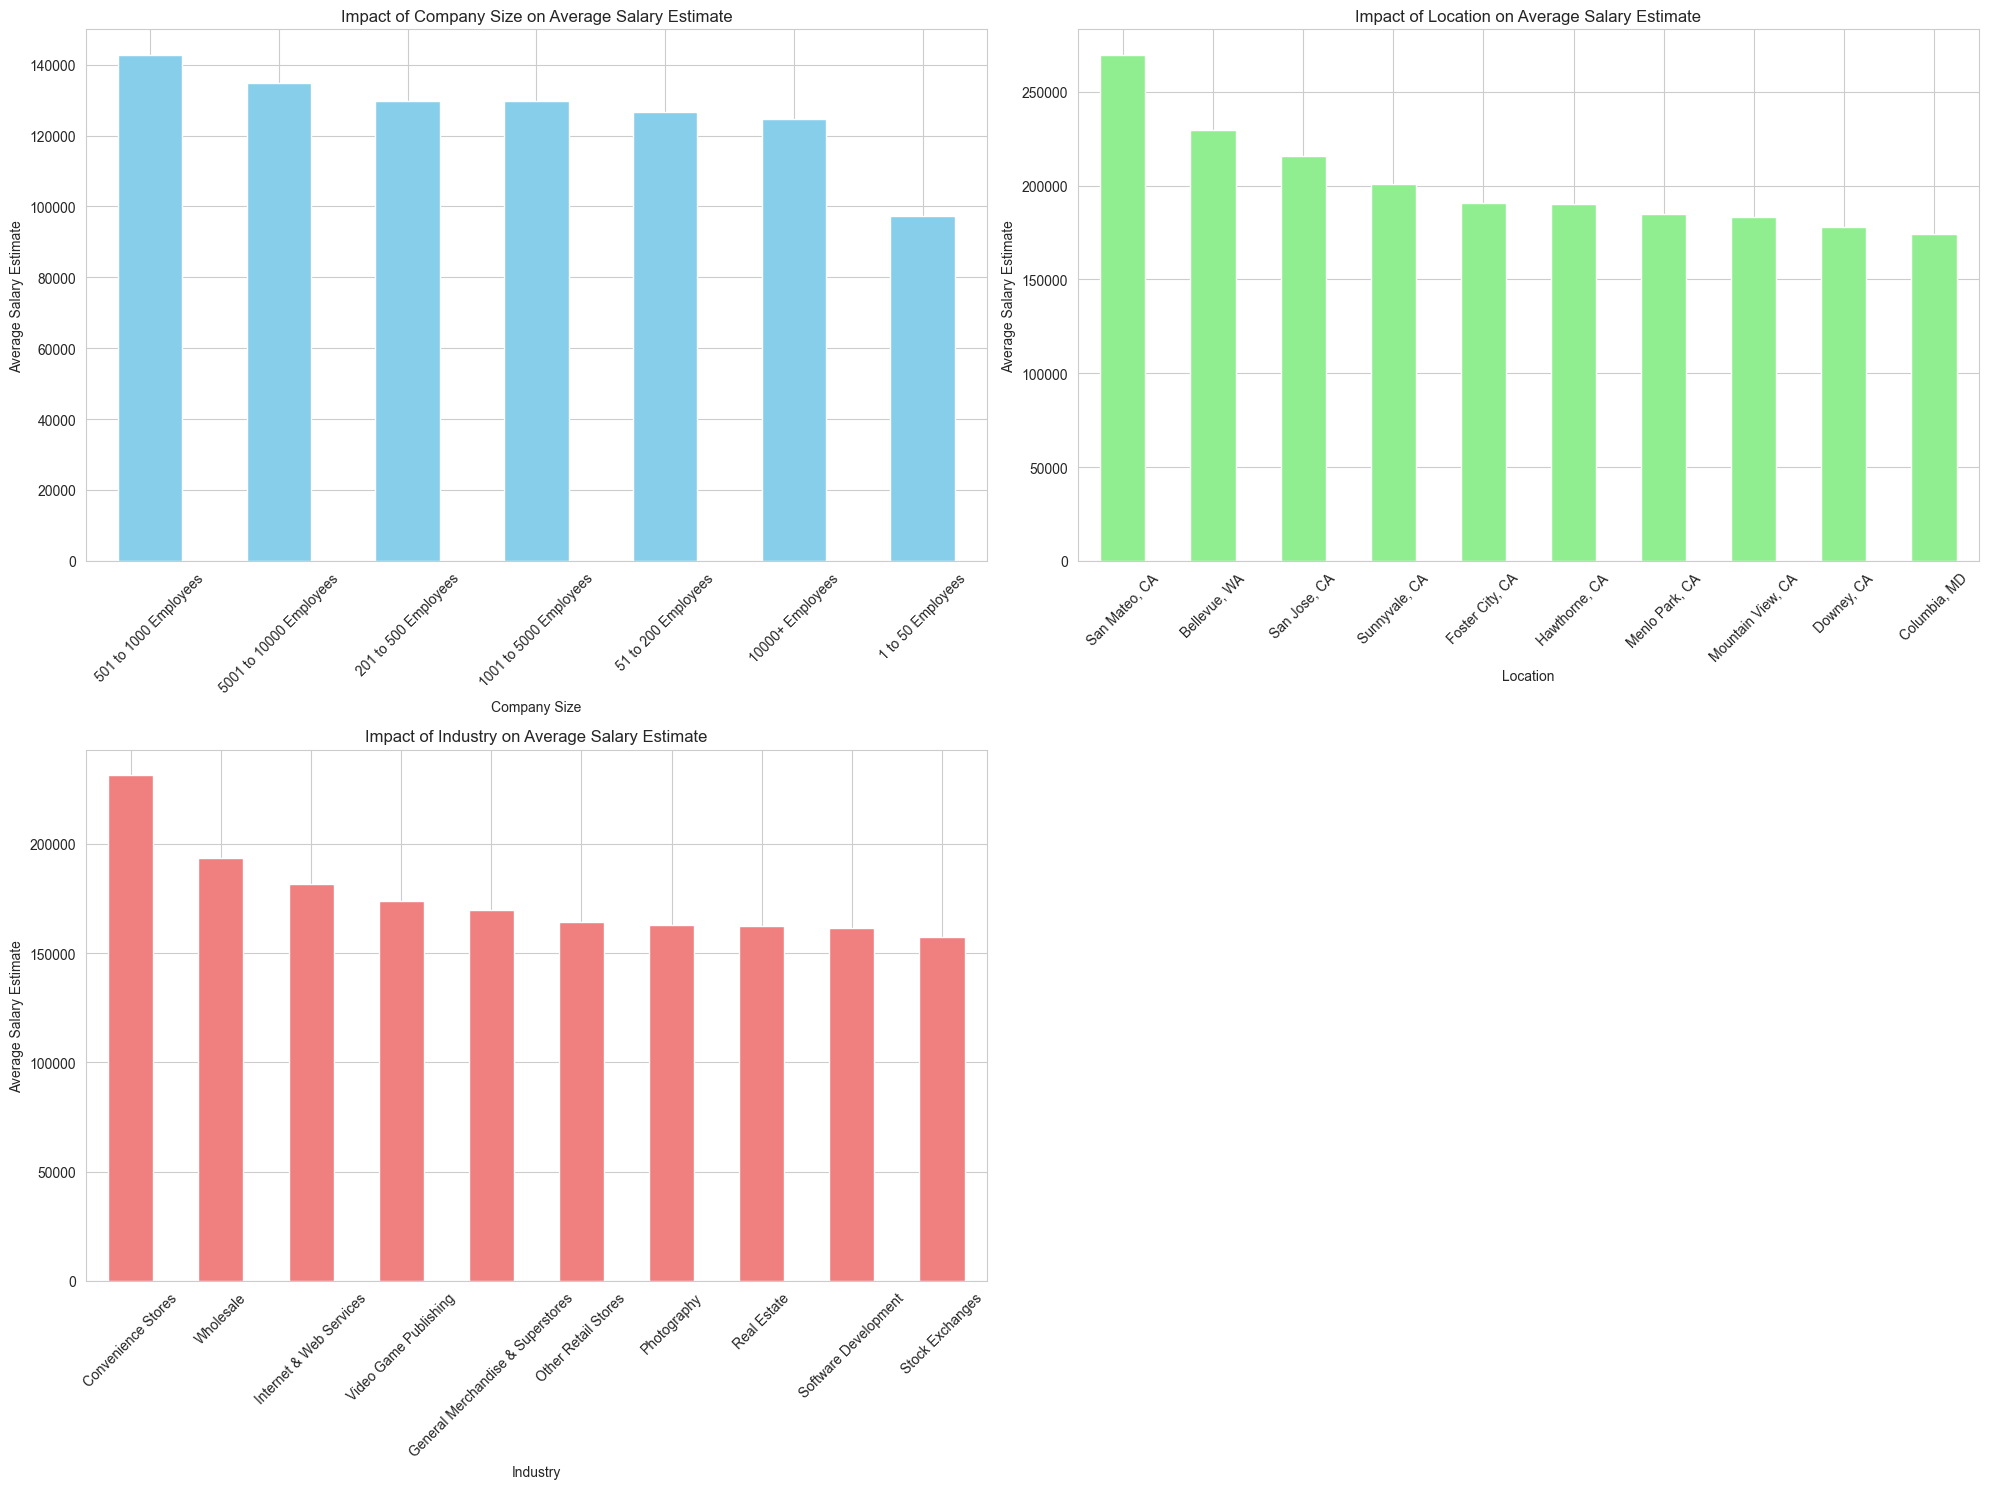

In [26]:
plt.figure(figsize=(20, 15))
# Visualizing the impact of 'Company Size' on 'Average Salary Estimate'
plt.subplot(2, 2, 1)
company_size_salary.plot(kind='bar', color='skyblue')
plt.title('Impact of Company Size on Average Salary Estimate')
plt.xlabel('Company Size')
plt.ylabel('Average Salary Estimate')
plt.xticks(rotation=45)
# Visualizing the impact of 'Location' on 'Average Salary Estimate'
plt.subplot(2, 2, 2)
location_salary.plot(kind='bar', color='lightgreen')
plt.title('Impact of Location on Average Salary Estimate')
plt.xlabel('Location')
plt.ylabel('Average Salary Estimate')
plt.xticks(rotation=45)
# Visualizing the impact of 'Industry' on 'Average Salary Estimate'
plt.subplot(2, 2, 3)
industry_salary.plot(kind='bar', color='lightcoral')
plt.title('Impact of Industry on Average Salary Estimate')
plt.xlabel('Industry')
plt.ylabel('Average Salary Estimate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
# Grouping the data by location and counting the number of job postings for each location
location_counts = glassdoor_jobs['Location'].value_counts().reset_index()
location_counts.columns = ['Location', 'Number of Jobs']
location_counts.head(10)

,Location,Number of Jobs
0,Remote,72
1,"Boston, MA",35
2,"San Francisco, CA",31
3,"Santa Clara, CA",26
4,"Charlotte, NC",23
5,"Herndon, VA",21
6,"Brooklyn, OH",20
7,"Aurora, CO",20
8,"Waltham, MA",19
9,"Agoura Hills, CA",19


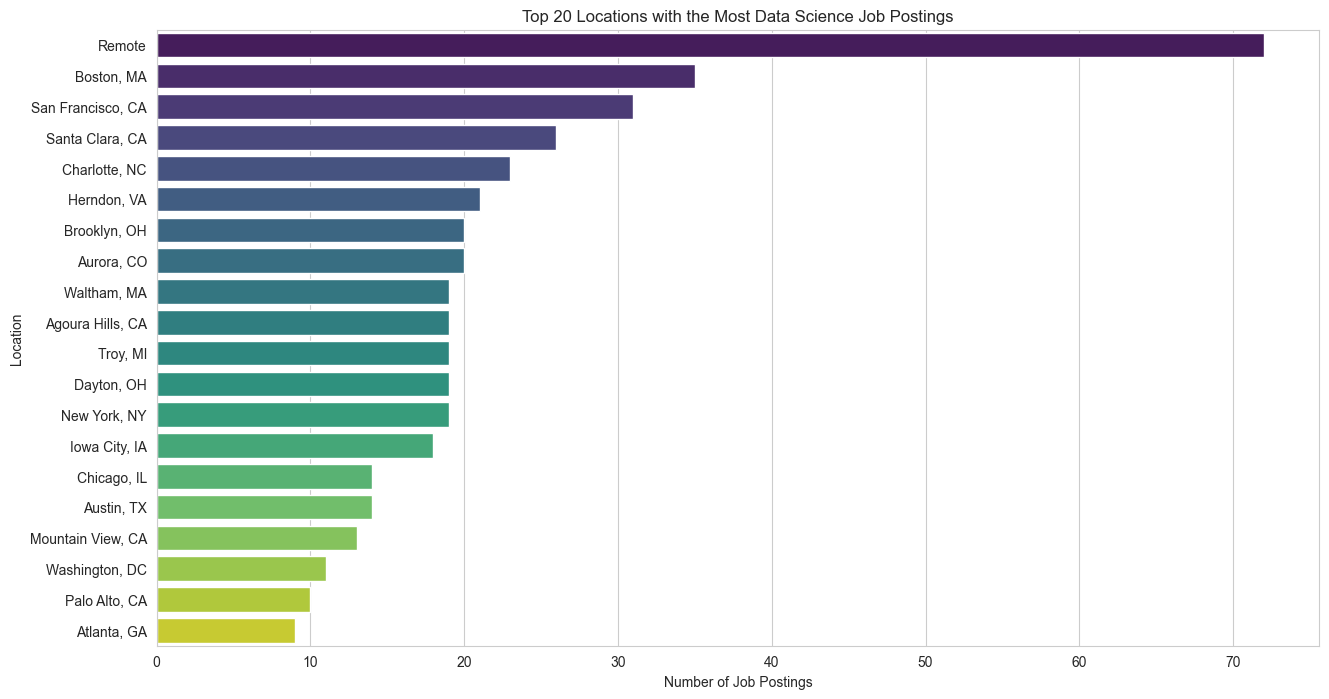

In [28]:
# Visualizing the top 20 locations with the most job postings using a bar chart
top_locations = location_counts.head(20)
plt.figure(figsize=(15, 8))
sns.barplot(x='Number of Jobs', y='Location', data=top_locations, palette='viridis')
plt.title('Top 20 Locations with the Most Data Science Job Postings')
plt.xlabel('Number of Job Postings')
plt.ylabel('Location')
plt.show()